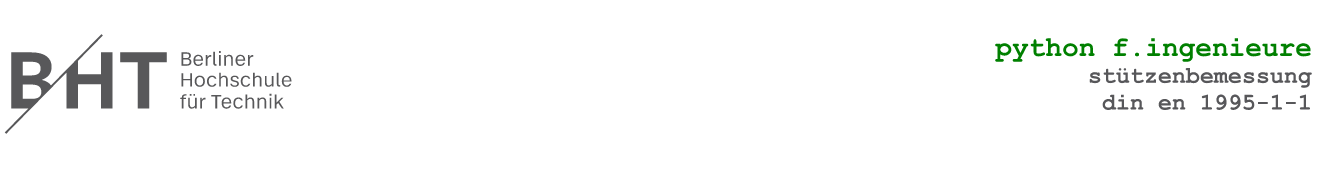

# Stützenbemessung nach der DIN EN 1995-1-1 Abs. 6.3

## Theorie II. Ordnung

Vor allem bei Stützen können baupraktisch unvermeidbare Imperfektionen und Vorverformungen zu einer Knickgefährdung des Tragwerks führen, sodass die Betrachtung des Gleichgewichts am verformten System maßgeblich sein kann. Als Alternative zur Bemessung mit dem Ersatzstabverfahren wird die Tragfähigkeit nach der Theorie II. Ordnung nachgewiesen, indem mit einer Vorverformung das Gleichgewichtssystem aufgestellt wird. Bei nichtlinearer Schnittgrößenermittlung word jedoch zur Vereinfachung weiterhin das linear-elastische Materialverhalten als Idealisierung herangezogen werden. <br>

Es folgt die Bemessung einer beidseitig gelenkig gelagerten Rechteckholzstütze.

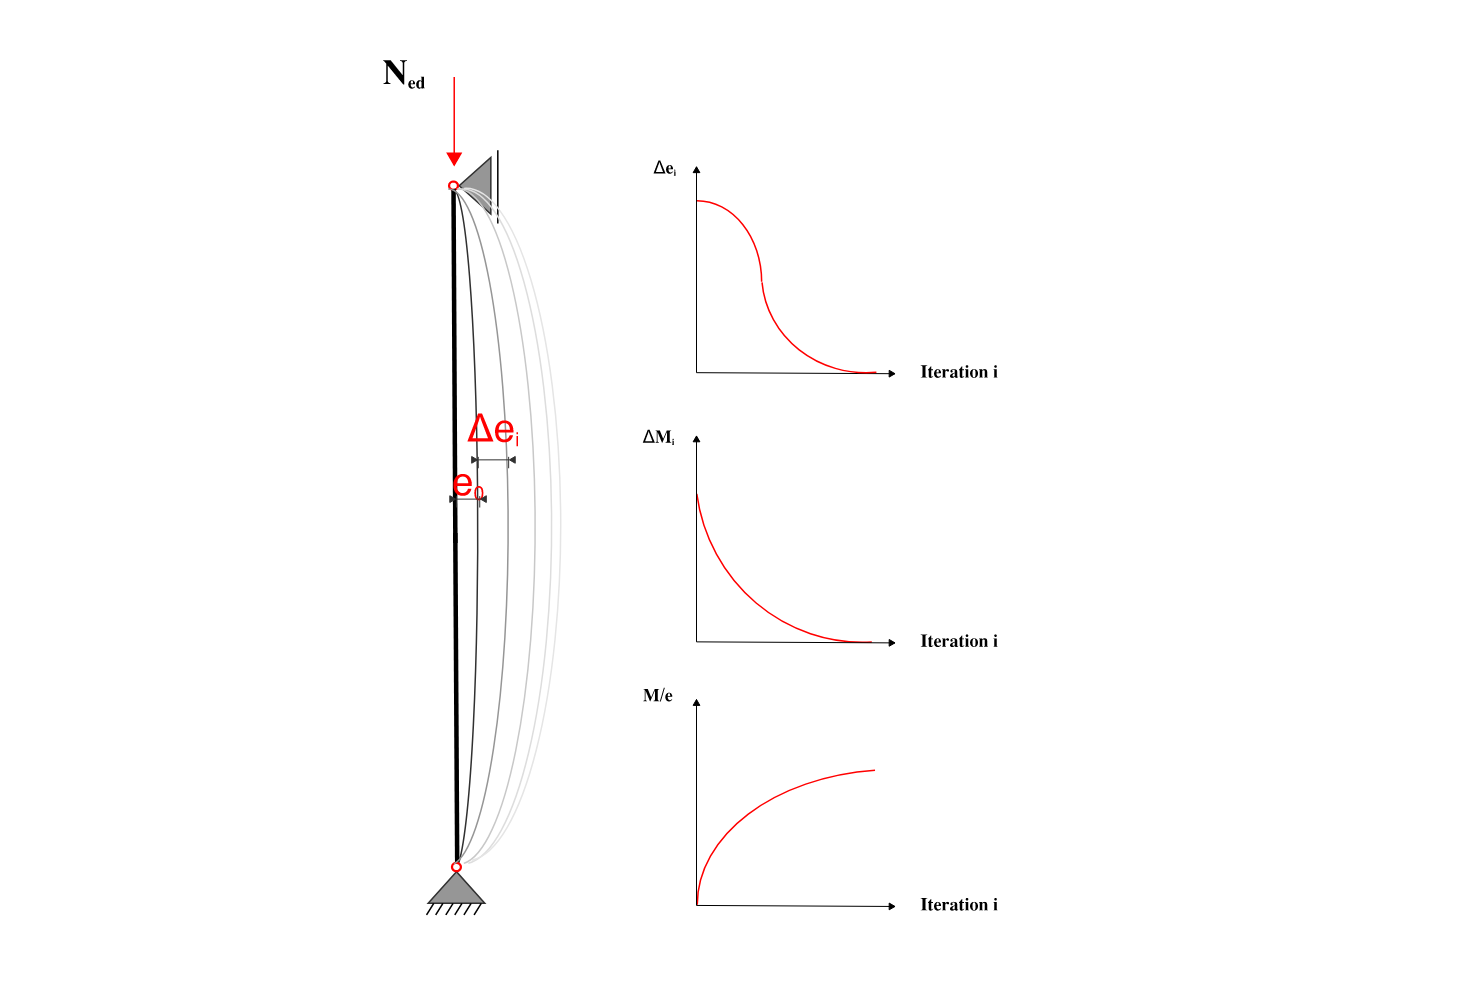

### Eingangswerte

In [38]:
# Bibliotheken
from math import sqrt, pi    # Mathematische Funktionen
import matplotlib.pyplot as plt    # Erstellen von Grafiken
import pandas as pd    # Erstellen von Tabellen
import handcalcs.render    # Darstellung formattierter Gleichungen

# Sytem und Geometrie
L = 3    # m - Länge
b = 0.5     # m - Breite
h = 0.4    # m - Höhe
theta = 1/400    # Vorverformung

# Einwirkung
N_ed = 2000    # kN - Normalkraft
M_yd = 50    # kNm - Moment um y-Achse
M_zd = 30    # kNm - Moment um z-Achse

# Festigkeitskennwerte
Güte = 'GL28h'    # Holzgüte
f_c0k = 28*1000    # $kN/m^2$ - Druck  
f_myk = 28*1000    # $kN/m^2$ - Biegung
f_mzk = 28*1000    # $kN/m^2$ - Biegung
E_0mean = 12500*1000    # $kN/m^2$ - E-Modul  

# Widerstandbeiwerte
k_mod = 0.8    # Modifikationsbeiwert
gamma = 1.3    # Teilsicherheitsbeiwert

#### System

In [39]:
%%render
Lagerung = 'Pendelstütze' 

<IPython.core.display.Latex object>

#### Geometrie

In [40]:
%%render params 1
l_ef = L*1.0    # m - Länge
b    # m - Breite
h    # m - Höhe

<IPython.core.display.Latex object>

#### Bemessungswerte der Einwirkung

In [41]:
%%render params 1
N_ed    # kN - Normalkraft
M_yd    # kNm - Moment um y-Achse
M_zd    # kNm - Moment um z-Achse

<IPython.core.display.Latex object>

#### Charakteristische Festigkeitswerte

In [42]:
%%render params 1
Güte    # Holzgüte
f_c0k    # $kN/m^2$ - Druck  
f_myk    # $kN/m^2$ - Biegung
f_mzk    # $kN/m^2$ - Biegung
E_0mean    # $kN/m^2$ - E-Modul  

<IPython.core.display.Latex object>

#### Widerstandsbeiwerte

In [43]:
%%render
k_mod    # Modifikationsbeiwert
gamma    # Teilsicherheitsbeiwert
xi = k_mod/gamma    # Abminderungsbeiwert

<IPython.core.display.Latex object>

### Berechnung

#### Querschnittsparameter

In [44]:
%%render params 3
A = b*h    # $m^2$ - Querschnitt

<IPython.core.display.Latex object>

In [45]:
%%render params 5
I_y = (b*h**3)/12    # $m^4$ - FTM
w_y = (b*h**2)/6    # $m^3$ - Widerstandsmoment
i_y = h/sqrt(12)    # $m$ - polares Trägheitsmoment

I_z = (h*b**3)/12    # $m^4$ - FTM
w_z = (h*b**2)/6    # $m^3$ - Widerstandsmoment
i_z = b/sqrt(12)    # $m$ - polares Trägheitsmoment

<IPython.core.display.Latex object>

#### Systembeiwerte

In [46]:
%%render 4
theta    # Vorverformung

<IPython.core.display.Latex object>

#### Bemessungswerte der Festigkeit

In [47]:
%%render
f_c0d = f_c0k*xi    # $N/mm^2$ - Bemessungswert der Druckfestigkeit
f_myd = f_myk*xi    # $N/mm^2$ - Bemessungswert der Biegefestigkeit
f_mzd = f_mzk*xi    # $N/mm^2$ - Bemessungswert der Biegefestigkeit
E_0meand =E_0mean/gamma    # $N/mm^2$ - Bemessungswert der Biegefestigkeit

<IPython.core.display.Latex object>

#### Schnittgrößen nach Theorie I. Ordnung
**DIN EN 1995-1-1 Abs- 5.4.3**

In [48]:
%%render 4
e_0 = l_ef*theta    # m
M_0 = e_0*N_ed    # kNm

<IPython.core.display.Latex object>

#### Schnittgrößen nach Theorie II. Ordnung

In [49]:
# Beiwert k_m
if M_yd == 0 or M_zd == 0:
    L_km = [[1,1],[1,1]]
else:
    L_km = [[1,0.7],[0.7,1]]
    
# Listen
L_bh = [[b,h],[h,b],[b,h],[h,b]]
L_e = [[e_0*1000],[0],[0],[e_0*1000]]
L_M = [[M_yd+M_0],[M_zd],[M_yd],[M_zd+M_0]]
L_e_total = [[e_0*1000],[0],[0],[e_0*1000]]
L_M_total = [[M_yd+M_0],[M_zd],[M_yd],[M_zd+M_0]]
L_sigma_mIId = []
L_Mi = [M_yd+M_0, M_zd, M_yd, M_zd+M_0]

# Schleife 1: Schnittgrößenermittlung nach Theorie II. Ordnung
for n in range(4):

    ## Querschnittsparameter
    A = b*h    # $m^2$ 
    I = (L_bh[n][0]*L_bh[n][1]**3)/12    # $m^4$ - FTM
    w = (L_bh[n][0]*L_bh[n][1]**2)/6    # $m^3$ - Widerstandsmoment
    i = L_bh[n][1]/sqrt(12)    # $m$ - polares Trägheitsmoment

    ## Theorie II. Ordnung
    # Schleife 2
    for i in range(5):  

        ## Ermittlung der Werte
        e_i = (L_M[n][i]*l_ef**2)/(E_0meand*I*pi**2)
        M_i = e_i * N_ed

        ## Anhängen der Werte in Listen
        L_e[n].append(round(e_i*1000,1))
        L_M[n].append(round(M_i,2)) 
        e_total = sum(L_e[n])
        M_total = sum(L_M[n])
        L_e_total[n].append(round(e_total,2))
        L_M_total[n].append(round(M_total,2))

    # Spannungen
    sigma_mIId = L_M_total[n][-1]/w #$kN/m^2$
    L_sigma_mIId.append(round(sigma_mIId,2))

# Ergebnisse in Listen
## Verformungen und Momente
L_e_res = [[L_e[0][-1], L_e[1][-1]], [L_e[2][-1], L_e[3][-1]]]
L_M_res = [[L_M[0][-1], L_M[1][-1]], [L_M[2][-1], L_M[3][-1]]]
L_e_total_res = [[L_e_total[0][-1], L_e_total[1][-1]], [L_e_total[2][-1], L_e_total[3][-1]]]
L_M_total_res = [[L_M_total[0][-1], L_M_total[1][-1]], [L_M_total[2][-1], L_M_total[3][-1]]]

## Spannungen nach Theorie II. Ordnung
sigma_cd = N_ed/A
sigma_myIId_imp = L_sigma_mIId[0]
sigma_mzIId = L_sigma_mIId[1]
sigma_myIId = L_sigma_mIId[2]
sigma_mzIId_imp = L_sigma_mIId[3]
L_sigma_mIId = [[sigma_myIId_imp, sigma_mzIId], [sigma_myIId, sigma_mzIId_imp]]

In [50]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

**um y-Achse** <br>
Um y-Achse: mit Vorverformung (um y-Achse), um z-Achse: ohne Vorverformung

In [51]:
# um y-Achse
## Erstellen eines Dictionaries
dict_y = {"Δey [mm]": L_e[0], "ΔMy [kNm]": L_M[0], "∑ey [mm]": \
   L_e_total[0], "∑My [kNm]": L_M_total[0]}

# Erstellen eines DataFrames
df_y = pd.DataFrame(dict_y)

# Anzeigen des DataFrames
display(df_y)


# um z-Achse
## Erstellen eines Dictionaries
dict_z = {"Δez [mm]": L_e[1], "ΔMz [kNm]": L_M[1], "∑ez [mm]": \
          L_e_total[1], "∑Mz [kNm]": L_M_total[1]}

# Erstellen eines DataFrames
df_z = pd.DataFrame(dict_z)

# Anzeigen des DataFrames
display(df_z)

,Δey [mm],ΔMy [kNm],∑ey [mm],∑My [kNm]
0,7.5,65.00,7.5,65.00
1,2.3,4.62,9.8,69.62
2,0.2,0.33,10.0,69.95
3,0.0,0.02,10.0,69.97
4,0.0,0.00,10.0,69.97
5,0.0,0.00,10.0,69.97


,Δez [mm],ΔMz [kNm],∑ez [mm],∑Mz [kNm]
0,0.0,30.00,0.0,30.00
1,0.7,1.37,0.7,31.37
2,0.0,0.06,0.7,31.43
3,0.0,0.00,0.7,31.43
4,0.0,0.00,0.7,31.43
5,0.0,0.00,0.7,31.43


**um z-Achse** <br>
Um y-Achse: ohne Vorverformung (um y-Achse), um z-Achse: mit Vorverformung

In [52]:
# um y-Achse
## Erstellen eines Dictionaries
dict_y = {"Δey [mm]": L_e[2], "ΔMy [kNm]": L_M[2], "∑ey [mm]": \
   L_e_total[2], "∑My [kNm]": L_M_total[2]}

# Erstellen eines DataFrames
df_y = pd.DataFrame(dict_y)

# Anzeigen des DataFrames
display(df_y)


# um z-Achse
## Erstellen eines Dictionaries
dict_z = {"Δez [mm]": L_e[3], "ΔMz [kNm]": L_M[3], "∑ez [mm]": \
          L_e_total[3], "∑Mz [kNm]": L_M_total[3]}

# Erstellen eines DataFrames
df_z = pd.DataFrame(dict_z)

# Anzeigen des DataFrames
display(df_z)

,Δey [mm],ΔMy [kNm],∑ey [mm],∑My [kNm]
0,0.0,50.00,0.0,50.00
1,1.8,3.56,1.8,53.56
2,0.1,0.25,1.9,53.81
3,0.0,0.02,1.9,53.83
4,0.0,0.00,1.9,53.83
5,0.0,0.00,1.9,53.83


,Δez [mm],ΔMz [kNm],∑ez [mm],∑Mz [kNm]
0,7.5,45.00,7.5,45.00
1,1.0,2.05,8.5,47.05
2,0.0,0.09,8.5,47.14
3,0.0,0.00,8.5,47.14
4,0.0,0.00,8.5,47.14
5,0.0,0.00,8.5,47.14


**Zusammenstellung**

In [53]:
#u m z-Achse
## Erstellen eines Dictionaries
dict_m = {"y (Imp)": [L_M_total[0][-1], L_sigma_mIId[0][0]], "z ": [L_M_total[1][-1], L_sigma_mIId[0][1]], "y ": \
          [L_M_total[2][-1], L_sigma_mIId[1][0]], "z (Imp)": [L_M_total[3][-1], L_sigma_mIId[1][1]]}
index = ['M [kNm]', 'σ [kNm2]']

# Erstellen eines DataFrames
df_m = pd.DataFrame(dict_m, index=index)

display(df_m)

,y (Imp),z,y,z (Imp)
M [kNm],69.97,31.43,53.83,47.14
σ [kNm2],5247.75,1885.80,4037.25,2828.40


## Nachweise
**Spannungsnachweis nach DIN EN 1995-1-1 Abs. 6.2.4**

In [54]:
k_m1 = L_km[0][0]
k_m2 = L_km[0][1]
sigma_my2d_imp = L_sigma_mIId[0][0]
sigma_mz2d = L_sigma_mIId[0][1]

k_m3 = L_km[1][0]
k_m4 = L_km[1][1]
sigma_y2d = L_sigma_mIId[1][0]
sigma_mz2d_imp = L_sigma_mIId[1][1]

In [55]:
%%render 2
eta_y = (sigma_cd/f_c0d)**2 + k_m1*sigma_my2d_imp/f_myd + k_m2*sigma_mz2d/f_mzd
eta_z = (sigma_cd/f_c0d)**2 + k_m3*sigma_y2d/f_myd + k_m4*sigma_mz2d_imp/f_mzd

<IPython.core.display.Latex object>

___
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022